## Inicjalizacja środowiska programistycznego

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params) 

2024-03-20 09:12:35.169276: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 09:12:35.169297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 09:12:35.170075: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-20 09:12:35.174465: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

<div>
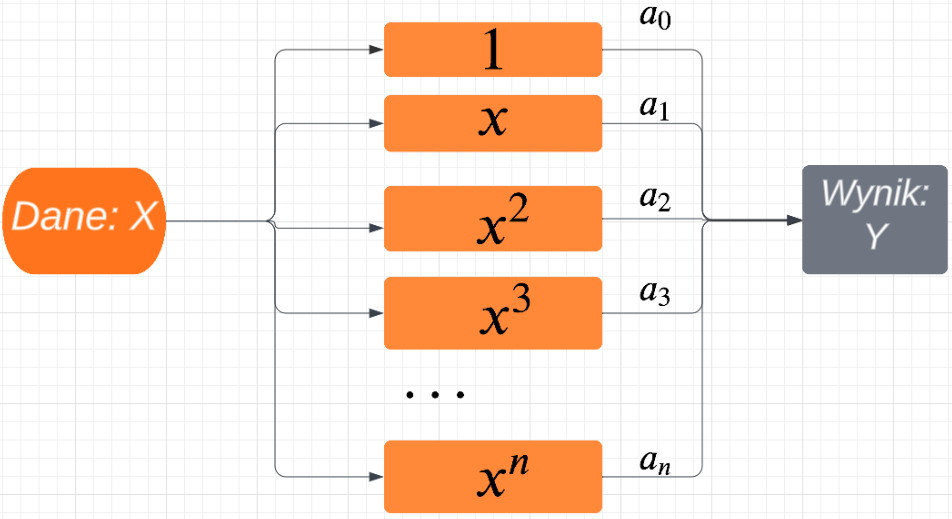
</div>

Rozwinięcie Taylora:
$$
\huge{
\begin{matrix*}[l]
f(x, a_{n}) = \\
\sum_{n=0}^{\infty} a_{n}x^{n} = \\
a_{0} + a_{1}x + a_{2}x^{2} +...
\end{matrix*}
}
$$
<br><br><br><br>
można przedstawić w postaci architektury łączącej wejście z wyjściem:

* wszystkie dane są podawane jednocześnie na wejście różnych funkcji bazowych: w tym przypadku $x^{n}$
* funkcje bazowe zwracają nowe liczby, które są sumowane z wagami: $a_{i}$
* suma jest zwracana jako wynik działania modelu

Wielomiany stopnia n nie są jednak zbyt dobrymi funkcjami bazy:

* uzyskanie dużej precyzji wymaga użycia wysokiego stopnia, a to generuje problemy ze stabilnością numeryczną
* dane wielowymiarowe powodują dodatkowe komplikacje - pojawiają się mieszane potęgi składowych danych:

$$
\huge{
x_{0}x_{1},~x_{0}^{3}x_{1}^{58},~\text{etc.}
}
$$

Rozwiązanie tego problemu wygląda następująco:

* wielowymiarowe dane redukujemy do jednej liczby, obliczając sumę ważoną z dodatkowym członem prasuwającym wartości sumy (ang. `bias`)

$$
\huge{
\sum_{i} w_{i}x_{i} + b
}
$$ 

* wynik sumy podajemy na wejściu do względnie prostej funkcji, która zwraca jedną wartość - **funkcji aktywacji** (ang. `activation function`):

$$
\huge{
A(\sum_{i} w_{i}x_{i} + b)
}
$$   

* funkcje aktywacji pełnią rolę bazy - różnią się między sobą. Różnica jest zwykle sparametryzowana.

$$
\huge{
A(x,  \mathbf{\theta} = \{w_{i}, b\})
}
$$

* wyjście może być traktowane jako wejście do kolejnej "rundy" - innych funkcji aktywacji

* **funkcje bazy w której rozwijamy nieznaną funkcję opisującą dane są zadane przez strukturę przepływu danych - połączenia
  między funkcjami aktywacji.** Nie znamy analitycznej postaci funkcji bazy. 

<div>
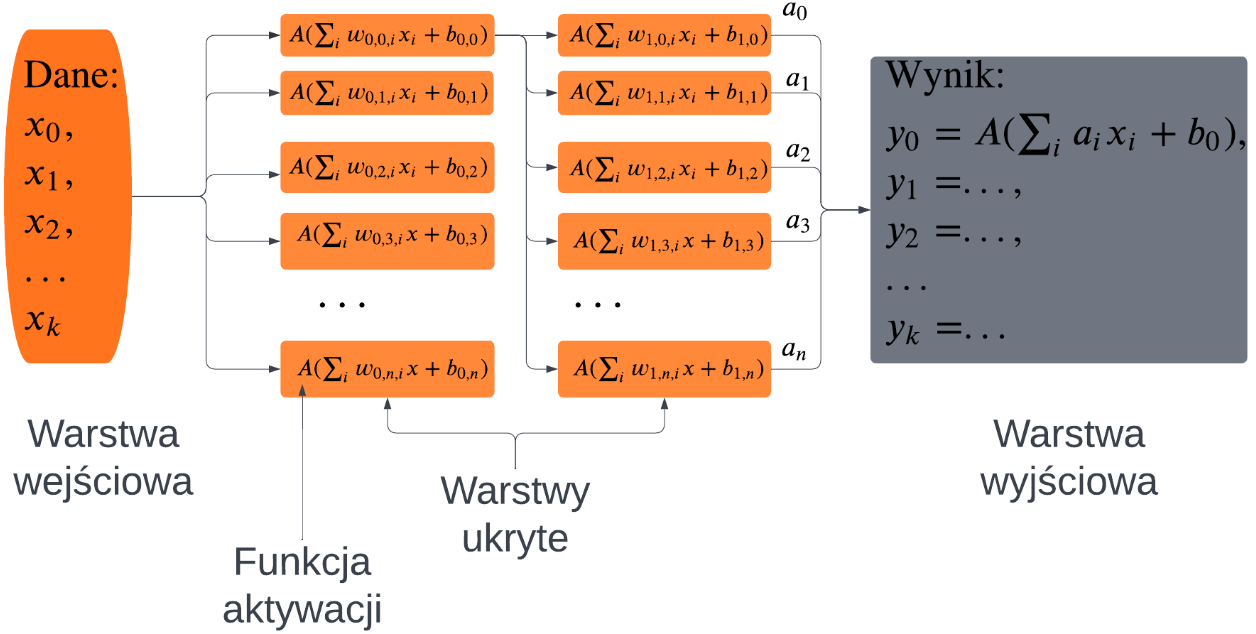
</div>

## Dlaczego architektura w pełni połączona działa?

# Twierdzenie o uniwersalnym aproksymatorze [Cybenko, 1989](https://link.springer.com/article/10.1007/BF02551274):

Zdefiniujmy ``neuron`` funkcję $R^{n} \rightarrow R$:
$$
\huge{
 f(\theta, x) = A(\sum_{i=1}^{N} \theta_{i} x_{i} + \theta_{0})
}
$$

gdzie `A` - to funkcja aktywacji - dowolna funkcja, nie będąca wielomianem, która spełnia warunki:

$$
\huge{
 \lim_{x\rightarrow -\infty} f(x) \rightarrow 0 \\
 \lim_{x\rightarrow +\infty} f(x) \rightarrow 1 \\
}
$$

Każda ciągła funkcja $R^{n} \rightarrow R$ może być przybliżona w bazie `neuronów` (= jedna warstwa neuronów).

$$
\huge{
y(x) \simeq \sum_{k} w_{k} f_{k}(\theta_{k}, x)
}
$$

Od 1989 roku udowodniono wiele wariantów twierdzenia o uniwersalnym aproksymatorze, w tym twierdzenia z innymi warunkami na funkcję aktywacji. 

* w warstwach ukrytych najbardziej popularną funkcją aktywacji jest **ReLU**
* w warstwie wyjściowej zwracającej prawdopodobieństwo jest używana funkcja **sigmoid** lub **softmax** - jej znormalizowany wariant dla n>2 kategorii:
$$
  \huge{
    \sigma(\mathbf{x})_{k} = \frac{e^{\mathbf{w}_{k}\mathbf{x} + b_{k}}}{\sum_{i=0}^{n-1} e^{\mathbf{w}_{i}\mathbf{x} + b_{i}}}
  }
$$
gdzie $\mathbf{w}_{i}$, $\mathbf{b}_{i}$ to wagi odpowiadające i-tej kategorii

**Proszę:**

* stworzyć rysunek z trzema panelami w rzędzie
* na kolejnych panelach narysować wykresy funkcji aktywacji: `sigmoid`, `tanh`, `relu`
* proszę zadbać o tę samą skalę na wszystkich panelach
* wartości funkcji proszę obliczyć korzystając z funkcji w module `tf.keras.activations`:
  ```Python
  
  sigmoid = tf.keras.activations.sigmoid(x)
  tanh = tf.keras.activations.tanh(x)
  relu = tf.keras.activations.relu(x)
  ```

2024-03-20 09:12:37.075624: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-20 09:12:37.081113: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-20 09:12:37.081222: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

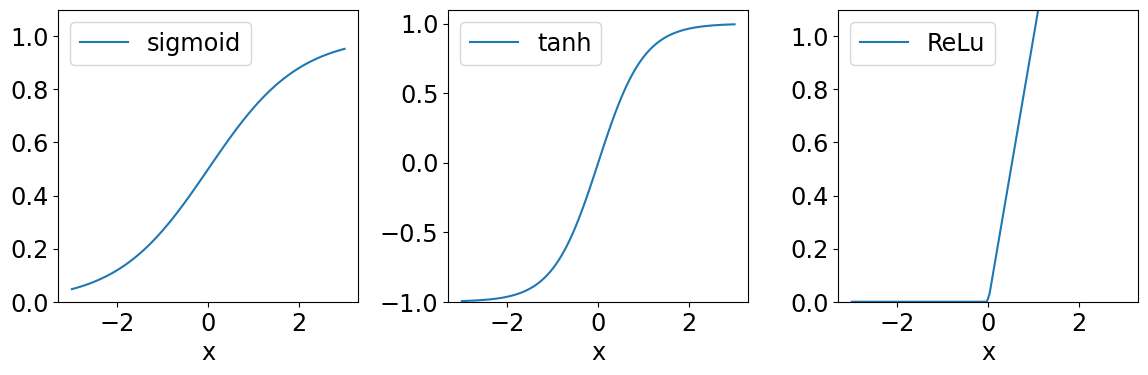

In [2]:
#BEGIN_SOLUTION
fig, axes = plt.subplots(1,3, figsize=(12, 4))

x = np.linspace(-3,3,100)

sigmoid = tf.keras.activations.sigmoid(x)
tanh = tf.keras.activations.tanh(x)
relu = tf.keras.activations.relu(x)

axes[0].plot(x, sigmoid, label="sigmoid")
axes[0].set_xlabel("x")
axes[0].set_ylabel("")
axes[0].set_ylim([0,1.1])
axes[0].legend()

axes[1].plot(x, tanh, label="tanh")
axes[1].set_xlabel("x")
axes[1].set_ylabel("")
axes[1].set_ylim([-1.0,1.1])
axes[1].legend()

axes[2].plot(x, relu, label="ReLu")
axes[2].set_xlabel("x")
axes[2].set_ylabel("")
axes[2].set_ylim([0,1.1])
axes[2].legend();
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

Uczenie maszynowe generalnie składa się z następujących etapów:

* **definicja** - wyrażenie zagadnienia w kontekście poszukiwania funkcji opisującej dane. Np. GPT (ten z chatGPT) określa prawdopodobieństwo następnego słowa w ciągu tekstu
* **definicja architektury** - określienie sposobu przepływu danych między wejściem a wyjściem.
  Standardowe architektury składają się z **warstw** ang. `layers`:
    * **wejściowej** - ang. `input layer`
    * **ukrytych** - ang. `hidden layers`
    * **wyjściowej** - ang. `output layer`
* **trening** - znajdowanie wartości parametrów funkcji aktywacji i wag w procesie wstecznej propagacji gradientu funkcji straty
* **testowanie** - ang. `testing, evaluation, validation` - oszacowania stopnia **generalizacji** modelu, czyli jak dobrze model się sprawuje w przypadku danych, które nie były używane do znajdowania parametrów modelu, czyli treningu

Na rynku jest wiele pakietów, które dostarczają narzędzi potrzebnych do tworzenia, trenowania i testowania modeli uczenia maszynowego. Dominujące to:

<br></br>

<a href="https://www.tensorflow.org">
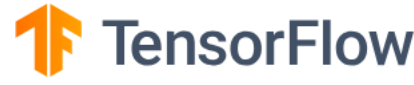
</a> 

zaawansowany pakiet do uczenia maszynowego rozwijany przez firmę Google. Definicja i trening modeli mogą być wykonane za pomocą interfejsu (Application Programming Interface, API) [Keras](https://keras.io/).
**Uwaga**: API Keras pozwala na użycie różnych środowisk wykonawczych: TensorFlow, PyTorch, JAX

<br></br>

<a href="https://pytorch.org/">
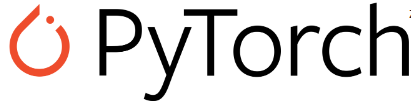
</a> 

zaawansowany pakiet do uczenia maszynowego stworzony przez MetaAI, obecnie pod kuratelą Linux Foundation

<br></br>

<a href="https://scikit-learn.org/stable/">
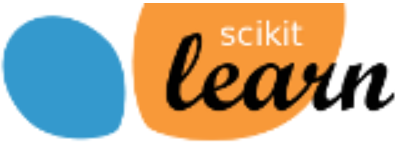
</a> 

pakiet do uczenia maszynowego rozwijany przez niezależny zespół. Zawiera wiele gotowych rozwiązań i przykładów z zakresu uczenia maszynowego i analizy danych 


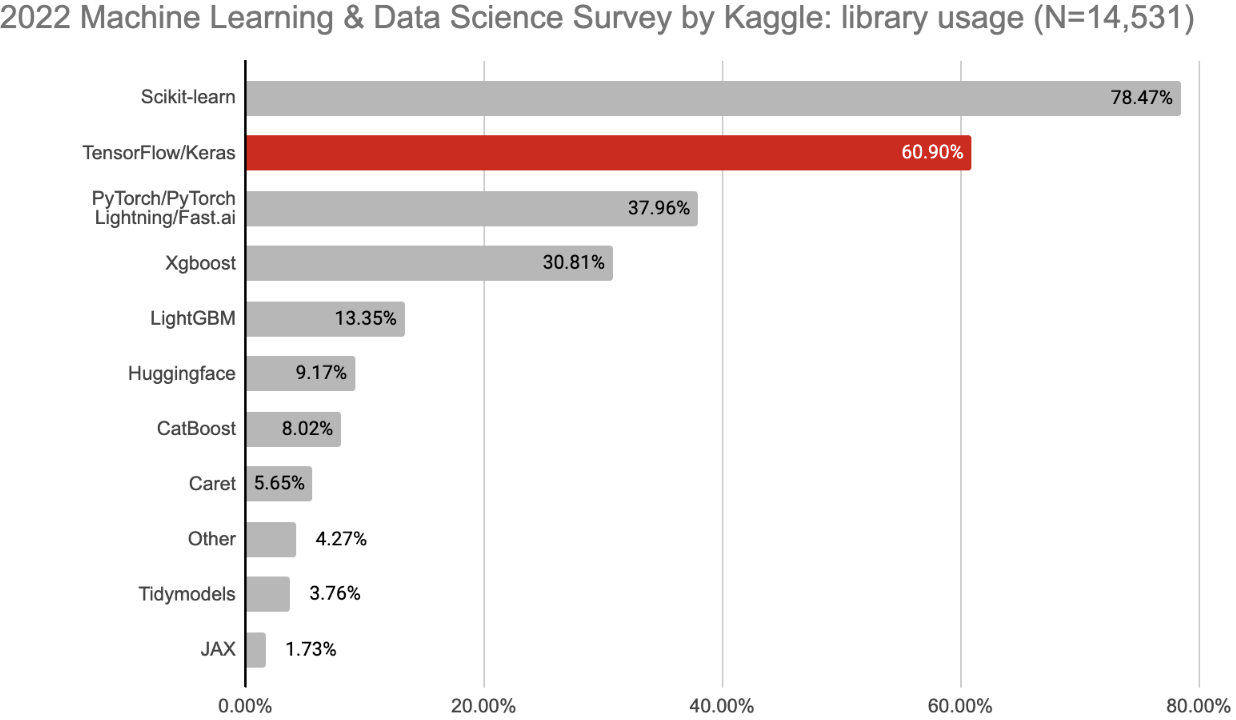
<br>
<a href="https://www.kaggle.com/kaggle-survey-2022">
    Źródło: https://www.kaggle.com/kaggle-survey-2022
</a> 

W trakcje zajęć będziemy głównie korzystali z biblioteki TensorFlow z interfejsem Keras.
Zacznijmy od stworzenia modelu, który będzie zawierał podstawowe warstwy:

**wejściową:**

```Python
input = tf.keras.Input(shape=(inputShape,), name="features")
```

**ukrytą:**, 

```Python
layer = tf.keras.layers.Dense(nHiddenNeurons, activation=activation, name="layer_{}".format(iLayer))(x)
``` 

**wyjściową:**

```Python
outputs = tf.keras.layers.Dense(nOutputNeurons, activation=activation, name="outputs")(x)
```

Wejście z wyjściem jest połączone wewnątrz klasy `tf.keras.model`:
```Python

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
```

Wagi warstwy są dostępne poprzez pole `weights`:
```Python
layer.weights
```

**Uwaga:** obciążenie, `bias` jest podawane jako osobny element listy zwracanej przez pole `weights`

In [3]:
nInputs = 4
nHidenNeurons = 3
nOutputNeurons = 1

inputs = tf.keras.Input(shape=(nInputs,), name="features")

iLayer = 1
layer = tf.keras.layers.Dense(nHidenNeurons, 
                              name="layer_{}".format(iLayer))(inputs)
            
outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer)   

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")

model.summary()

print(colored("Model weights:","blue"),model.get_layer('layer_1').weights)

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 4)]               0         
                                                                 
 layer_1 (Dense)             (None, 3)                 15        
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model weights: [<tf.Variable 'layer_1/kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.9154916 , -0.63219   , -0.00779563],
       [-0.2441147 , -0.48836142, -0.7039515 ],
       [ 0.00710714, -0.16956156,  0.8904271 ],
       [-0.25743878,  0.5521152 , -0.08506799]], dtype=float32)>, 

**Proszę:**

* obliczyć samodzielnie liczbę parametrów warstwy ukrytej

**Wskazówka:** każdy neuron ma oddzielną wagę dla każdej zmiennej wejściowej oraz dodatkową wagę, `bias`. 

In [4]:
#BEGIN_SOLUTION
nWeights = nHidenNeurons*(nInputs +1) 
print(colored("Number of weights in hidden layer:","blue"),nWeights)
#END_SOLUTION
pass

Number of weights in hidden layer: 15


Małe modele można wizualizować korzystając z funkcji biblioteki Keras:

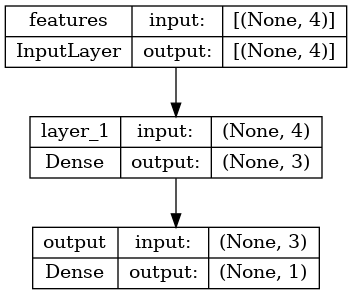

In [5]:
tf.keras.utils.plot_model(model, 'fig_png/ML_model.png', show_shapes=True)

Funkcje używane w czasie treningu:

* algorytm minimalizacyjny - `optimizer`
* funkcja straty - `loss`
* lista metryk śledzonych w czasie treningu - `metrics`

są określane przy wywołaniu metody `tf.keras.model.compile`:

In [6]:
lr = 0.001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'])

Pętla ucząca jest wywołana przez metodę `tf.keras.fit`, która przyjmuje wiele parametrów sterujących procesem treningu.
Konieczne są dwa:

* cechy i etykiety zbioru uczącego - `x, y` 
* liczba epok - `epochs`

Metoda `fit` zwraca obiekt zawierający dane na temat historii uczenia - wartości metryk i funkcji straty w kolejnych epokach:
```Python
history = model.fit(x=x, y=y,  epochs=nEpochs, verbose=2)
print(history.history)
```

**Proszę:**

Skonstruować model uczenia maszynowego, który będzie umiał obliczyć kwadrat długości czterowektora. 

* model powinen być tak zbudowany by można było interpretować jego wagi.
* jako danych uczących proszę użyć danych syntetycznych na czterowymiarowej kostce o boku `[-1,1]`
* kod powinien być podzielony na funkcje:
    * generacja danych: `getData(nPoints)`
    * tworzenie modelu: `getModel(nHidenNeurons, nOutputNeurons, lr)`
    * rysowanie funkcji straty w kolejnych epokach: `plotTrainHistory(history)` 

In [7]:
#BEGIN_SOLUTION
def getData(nPoints):
    return tf.random.uniform((nPoints,4), -1,1)
###################################################################### 
######################################################################
def getModel(nInputs, nHidenNeurons, nOutputNeurons, lr):
    inputs = tf.keras.Input(shape=(nInputs,), name="features")
    
    iLayer = 1
    layer = tf.keras.layers.Dense(nHidenNeurons, 
                                  name="layer_{}".format(iLayer))(inputs)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer)   
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'])
    return model
###################################################################### 
######################################################################
def plotTrainHistory(history):
    
    fig, axes = plt.subplots(1,2, figsize=(7,3))
    axes[0].plot(history.history['loss'], label = 'train')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss function')
    axes[0].legend(loc='upper right')
    
    axes[1].plot(history.history['loss'], label = 'train')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss function')
    axes[1].legend(loc='upper right')
    axes[1].set_yscale('log')
    
    plt.subplots_adjust(bottom=0.02, left=0.02, right=0.98, wspace=0.6)
    plt.savefig("fig_png/training_history.png", bbox_inches="tight")
###################################################################### 
###################################################################### 
#END_SOLUTION
pass

**Proszę:**

* przeprowadzić trening modelu
* wypisać na ekran wartości funkcji straty i metryk dla zadanego zbioru:
  <br></br>
  ```Python
  model.evaluate(x,y)
  ```
  <br></br>
* wypisać na ekran wynik działania modelu dla pojedynczego przykładu:
  <br></br>
  ```Python
  model.predict([[125,0,0,0]])
  ```
  <br></br>
* narysować ewolucję funkcji straty w skalach liniowej i logarytmicznej
* wypisać i zinterpretować wagi modelu

2024-03-20 09:12:39.900441: I external/local_xla/xla/service/service.cc:168] XLA service 0x7be0b5ccb5d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-20 09:12:39.900459: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2024-03-20 09:12:39.903956: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-20 09:12:40.251001: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1710922360.301283    8469 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 0s 62ms/step
Model response for: [[125   0   0   0]] [[125.04752]]
Model weights:
layer_0: [-0.5087294  0.5087236  0.5086439  0.5084524]
output: [-1.9664305]
layer_0*output: [ 1.000381  -1.0003697 -1.0002129 -0.9998364]
Layers bias:
layer_0: -9.917452e-05
output: -0.00029953374
CPU times: user 55.3 s, sys: 4.05 s, total: 59.4 s
Wall time: 38.3 s


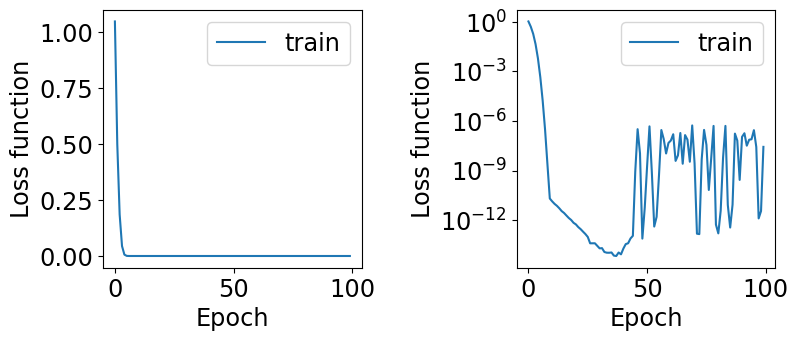

In [8]:
%%time
##BEGIN_SOLUTION
nInputs = 4
nHidenNeurons = 1
nOutputNeurons = 1

nPoints = 10000
x = getData(nPoints)
y = np.sum(x*(1,-1,-1,-1), axis=1)

nInputs = 4
nHidenNeurons = 1
nOutputNeurons = 1
lr = 1E-3
model = getModel(nInputs, nHidenNeurons, nOutputNeurons, lr)

nEpochs = 100
history = model.fit(x=x, y=y, epochs=nEpochs, verbose=0)
metrics = model.evaluate(x=x, y=y)

x_test = np.array([[125,0,0,0]])
print(colored("Model response for:","blue"),x_test,model.predict(x_test))

plotTrainHistory(history)

print(colored("Model weights:","blue"))
print(colored("layer_0:","blue"), model.get_layer('layer_1').weights[0].numpy()[:,0])
print(colored("output:","blue"), model.get_layer('output').weights[0].numpy()[:,0])
print(colored("layer_0*output:","blue"), (model.get_layer('layer_1').weights[0]*model.get_layer('output').weights[0]).numpy()[:,0])

print(colored("Layers bias:","blue"))
print(colored("layer_0:","blue"), model.get_layer('layer_1').weights[1].numpy()[0])
print(colored("output:","blue"), model.get_layer('output').weights[1].numpy()[0])

#END_SOLUTION
pass

Funkcja straty w końcowym etapie treningu wykazuje duże oscylacje - **zejście gradientowe skacze wokół minimum** ponieważ współczynnik uczenia mnożący gradient jest za duży. Zjawisko to można zredukować, zmniejszając współczynnik uczenia w trakcie treningu. Algorytm zmiany `lr` zadaje się w konstruktorze klasy do optymalizacji, podając funkcję zwracającą wartość `lr` dla danego kroku optymalizacyjnego zamiast stałej wartości `lr`.

In [9]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=1000,
                decay_rate=0.98,
                staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

print(colored("LR for step 999:","blue"),lr_schedule(step=999).numpy())
print(colored("LR for step 1000:","blue"),lr_schedule(step=1000).numpy())

LR for step 999: 0.001
LR for step 1000: 0.00098


**Proszę:**

* powtórzyć trening modelu obliczającego kwadrat długości czterowektora używając zmiennej w czasie wartości współczynnika uczenia
* parametry zmiany współczynnika uczenia proszę dobrać tak, by zlikwidować efekt oscylacji funkcji straty

313/313 [==============================] - 0s 886us/step - loss: 9.2943e-15 - mean_absolute_percentage_error: 5.7023e-05 - root_mean_squared_error: 9.6407e-08
Model weights:
layer_0: [-0.6807991  0.6807992  0.6807991  0.6807991]
output: [-1.468862]
layer_0*output: [ 1.        -1.0000001 -1.        -1.       ]
Layers bias:
layer_0: 0.00012441825
output: 0.00018280317


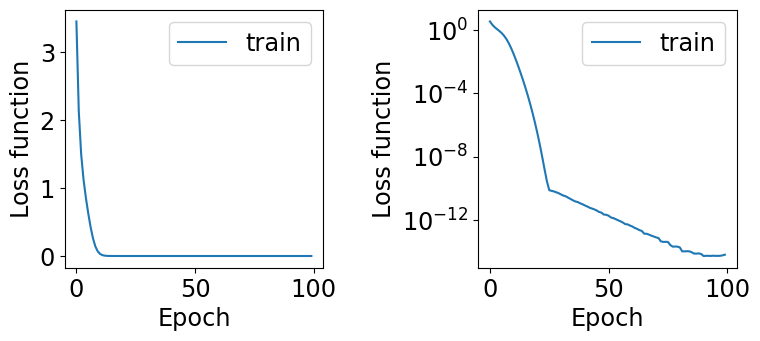

In [10]:
#BEGIN_SOLUTION
nInputs = 4
nHidenNeurons = 1
nOutputNeurons = 1

initial_learning_rate = 1E-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)

model = getModel(nInputs, nHidenNeurons, nOutputNeurons, lr_schedule)

nEpochs = 100
history = model.fit(x=x, y=y, epochs=nEpochs, verbose=0)
metrics = model.evaluate(x=x, y=y)
plotTrainHistory(history)

print(colored("Model weights:","blue"))
print(colored("layer_0:","blue"), model.get_layer('layer_1').weights[0].numpy()[:,0])
print(colored("output:","blue"), model.get_layer('output').weights[0].numpy()[:,0])
print(colored("layer_0*output:","blue"), (model.get_layer('layer_1').weights[0]*model.get_layer('output').weights[0]).numpy()[:,0])
print(colored("Layers bias:","blue"))
print(colored("layer_0:","blue"), model.get_layer('layer_1').weights[1].numpy()[0])
print(colored("output:","blue"), model.get_layer('output').weights[1].numpy()[0])
#END_SOLUTION
pass

Gradient jest obliczany dla paczek, `batches` przykładów. Domyślna krotność paczki to `32`. Rozmiarem paczki steruje parametr `batch_size`:
```Python
model.fit(x=x, y=y, epochs=nEpochs, batch_size = 128, verbose=0)
```

**Proszę:**

* przeprowadzić trening z różnymi rozmiarami paczki
* jak rozmiar paczki wpływa na zbieżności treningu?

**Uwaga:** model trzeba stworzyć od nowa, inaczej będzie miał wartości wag ustalone w poprzednim treningu.

79/79 [==============================] - 0s 848us/step - loss: 1.7012e-11 - mean_absolute_percentage_error: 0.0035 - root_mean_squared_error: 4.1246e-06
Model weights:
layer_0: [-1.1895397  1.1895293  1.1895384  1.189539 ]
output: [-0.84066343]
layer_0*output: [ 1.0000025 -0.9999938 -1.0000014 -1.0000019]
Layers bias:
layer_0: -0.0065030125
output: -0.0054669925


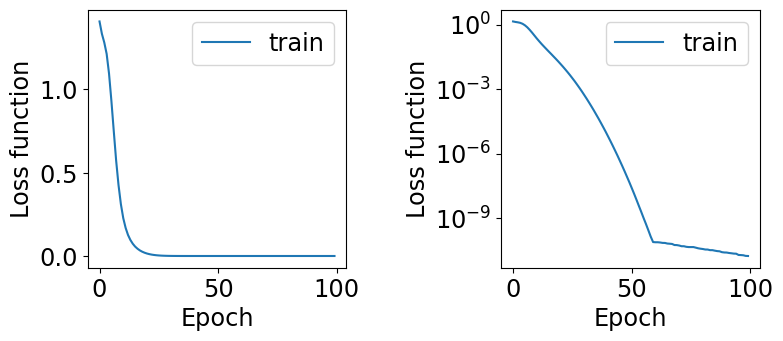

In [11]:
#BEGIN_SOLUTION
model = getModel(nInputs, nHidenNeurons, nOutputNeurons, lr_schedule)

nEpochs = 100
history = model.fit(x=x, y=y, epochs=nEpochs, batch_size = 128, verbose=0)
metrics = model.evaluate(x=x, y=y, batch_size = 128)
plotTrainHistory(history)

print(colored("Model weights:","blue"))
print(colored("layer_0:","blue"), model.get_layer('layer_1').weights[0].numpy()[:,0])
print(colored("output:","blue"), model.get_layer('output').weights[0].numpy()[:,0])
print(colored("layer_0*output:","blue"), (model.get_layer('layer_1').weights[0]*model.get_layer('output').weights[0]).numpy()[:,0])
print(colored("Layers bias:","blue"))
print(colored("layer_0:","blue"), model.get_layer('layer_1').weights[1].numpy()[0])
print(colored("output:","blue"), model.get_layer('output').weights[1].numpy()[0])
#END_SOLUTION
pass

Trening może być automatycznie zakończony wcześniej, jeśli wybrana metryka nie wykazuje poprawy. Wcześniejsze zatrzymanie treningu nosi nazwę `early stopping`.
Procedura ta jest kontrolowana przez dodatkowe funkcje, które są wywoływane w czasie treningu: `callbacks`:
```Python

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)

model.fit(x=x, y=y, epochs=nEpochs, 
                    batch_size = 128, 
                    verbose=0,
                    callbacks=[callback]
                   )
```

**Proszę:**

* skonfigurować funkcję `tf.keras.callbacks.EarlyStopping` tak by zatrzymała wcześniej trening modelu znajdującego długość czterowektora.

Epoch 9: early stopping
313/313 [==============================] - 0s 880us/step - loss: 2.9395e-07 - mean_absolute_percentage_error: 0.3640 - root_mean_squared_error: 5.4217e-04
Model weights:
layer_0: [ 0.7638131  -0.76383317 -0.7635713  -0.7630761 ]
output: [1.3093053]
layer_0*output: [ 1.0000645 -1.0000908 -0.999748  -0.9990996]
Layers bias:
layer_0: 2.7667778e-05
output: -1.9505436e-05


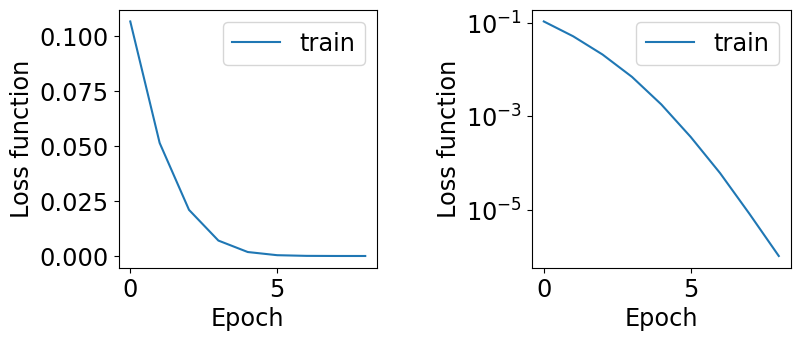

In [12]:
#BEGIN_SOLUTION
model = getModel(nInputs, nHidenNeurons, nOutputNeurons, lr_schedule)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1, min_delta=1E-3)

nEpochs = 100
history = model.fit(x=x, y=y, epochs=nEpochs, 
                    batch_size = 128, 
                    verbose=0,
                    callbacks=[callback]
                   )
metrics = model.evaluate(x=x, y=y)
plotTrainHistory(history)

print(colored("Model weights:","blue"))
print(colored("layer_0:","blue"), model.get_layer('layer_1').weights[0].numpy()[:,0])
print(colored("output:","blue"), model.get_layer('output').weights[0].numpy()[:,0])
print(colored("layer_0*output:","blue"), (model.get_layer('layer_1').weights[0]*model.get_layer('output').weights[0]).numpy()[:,0])
print(colored("Layers bias:","blue"))
print(colored("layer_0:","blue"), model.get_layer('layer_1').weights[1].numpy()[0])
print(colored("output:","blue"), model.get_layer('output').weights[1].numpy()[0])
#END_SOLUTION
pass

# Zadanie domowe

Trening modelu z jednym neutronem, z liniową funkcją aktywacji, który odtworzy współczynniki trójmianu:
<br></br>
$$
\huge{
  -2 + 3x + 2x^{2}
}
$$
<br></br>

**Proszę:**

* wygenerować dane syntetyczne z parami `(x,y)`
* dodać do `x` kolumny zawierające wymagane potęgi `x`
* zdefiniować i wytrenować model z jednym neuronem
* narysować ewolucję funkcji straty w skalach liniowej i logarytmicznej
* narysować dane użyte do treningu oraz wynik działania modelu
* narysować histogram różnicy względnej modelu i prawdziwej wartości: `(true-model)/true`
* wypisać i zinterpretować wagi modelu porównując je ze współczynnikami dwumianu

32/32 [==============================] - 0s 751us/step
Model weights:
layer_0: [1.24843   1.8726454]
output: [1.6020116]
layer_0*output: [1.9999993 2.9999995]
Layers bias:
layer_0: [-1.6716293]
output: [0.6779694]
total bias: [[-2.]]


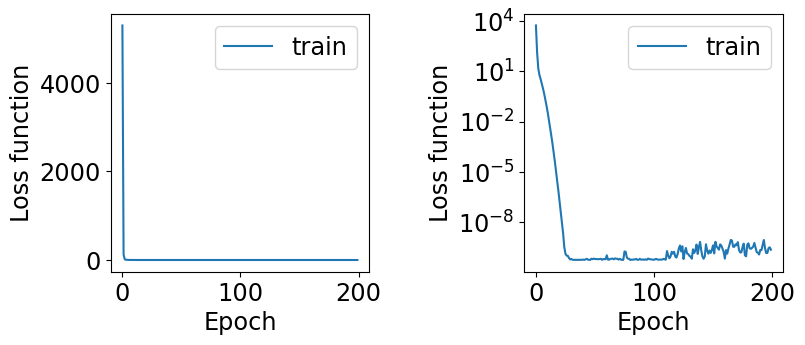

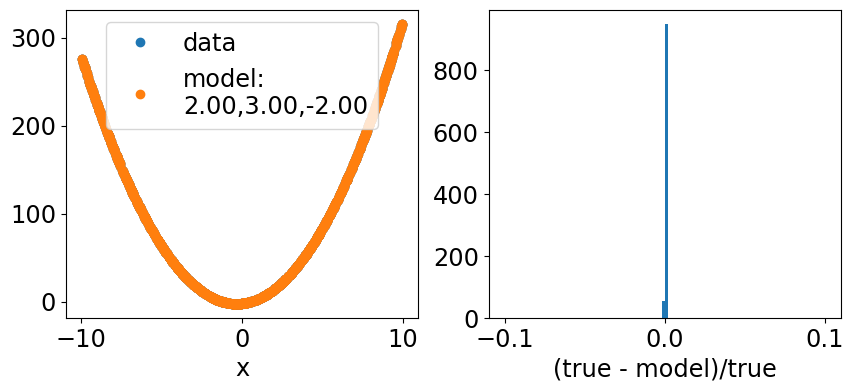

In [13]:
#BEGIN_SOLUTION

##data preparation
nPoints = 1000
x = tf.random.uniform((nPoints,1), -10,10)
x = np.hstack([x,x**2])
coeffs = np.array([2,3])
y = np.sum(coeffs*x, axis=1) - 2

##model definition
nInputs = 2
nHidenNeurons = 1
nOutputNeurons = 1

initial_learning_rate = 1E-1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)

model = getModel(nInputs, nHidenNeurons, nOutputNeurons, lr_schedule)

#training
nEpochs = 200
history = model.fit(x=x, y=y, epochs=nEpochs, verbose=0)
metrics = model.evaluate(x=x, y=y)
y_pred = model.predict(x)
plotTrainHistory(history)

print(colored("Model weights:","blue"))
print(colored("layer_0:","blue"), model.get_layer('layer_1').weights[0].numpy()[:,0])
print(colored("output:","blue"), model.get_layer('output').weights[0].numpy()[:,0])
finalWeight = (model.get_layer('layer_1').weights[0]*model.get_layer('output').weights[0]).numpy()[:,0]
print(colored("layer_0*output:","blue"), finalWeight[:])

print(colored("Layers bias:","blue"))
l1_bias = model.get_layer('layer_1').weights[1].numpy()
output_weight = model.get_layer('output').weights[0].numpy()
output_bias = model.get_layer('output').weights[1].numpy()
total_bias = l1_bias*output_weight+output_bias

print(colored("layer_0:","blue"), model.get_layer('layer_1').weights[1].numpy())
print(colored("output:","blue"), model.get_layer('output').weights[1].numpy())
print(colored("total bias:","blue"), total_bias)
finalWeight = np.append(finalWeight,total_bias)

#plotting
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(x[:,0],y, "o",label="data")
axes[0].plot(x[:,0],y_pred,"o",label="model:\n{:3.2f},{:3.2f},{:3.2f}".format(finalWeight[0], 
                                                                              finalWeight[1], 
                                                                              finalWeight[2]))
axes[0].set_xlabel("x")
axes[0].legend()

delta = (y - y_pred[:,0])/y
axes[1].hist(delta, bins=np.linspace(-0.1,0.1,101))
axes[1].set_xlabel("(true - model)/true")
#END_SOLUTION
pass